# SIR with constant beta 

In [1]:
from gekko import GEKKO 
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt 

In [2]:
%%time
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

def camp(nf,nt,beta,gamma,u1max,u2max):
    m = GEKKO()  # create GEKKO model
    n_f=nf
    n_t=nt  
    m.time = np.linspace(0,nf,nt) # time points

    b=15
    c=1

    i0=0.01
    s0=1-i0

    s = m.Var(s0,lb=0,ub=1) 
    i = m.Var(i0,lb=0,ub=1) # create GEKKO variables
    j = m.Var(s0)
    u1= m.Var(u1max, lb=0 , ub=u1max)
    u2 = m.Var(0 , lb=0 , ub=u2max)
 
    p=np.zeros(nt)
    p[-1]=1
    final = m.Param(value=p)

    # create GEKKO equations
    m.Equation(s.dt() == -(beta+u2)*s*i - u1*s)
    m.Equation(i.dt() == (beta+u2)*s*i+u1*s-gamma*i)
    m.Equation(j.dt() == b*u1**2 + c*u2**2)

    m.Obj(s*final+j*final)


 
    m.options.IMODE = 6
    #m.options.NODES = 4
    m.solve(disp=False)
    return s.value,i.value,u1.value,u2.value



Wall time: 0 ns


In [3]:
%%time
tf=5
n=500
time=np.linspace(0,tf,n)
beta=[1,0.03]
gamma=0.1
u1_max=0.06
u2_max=0.3
s1,i1,u1_1,u2_1=camp(tf,n,beta[0],gamma,u1_max,u2_max)
s2,i2,u1_2,u2_2=camp(tf,n,beta[1],gamma,u1_max,u2_max)

Wall time: 27.4 s


In [4]:
def sir(t, z, beta, gamma):
    s, i = z
    return [-beta*s*i, beta*s*i -gamma*i]

sol1 = solve_ivp(sir, [0, tf],[0.99, 0.01],t_eval=time,args=(beta[0],gamma),
                dense_output=True)
sol2 = solve_ivp(sir, [0, tf],[0.99, 0.01],t_eval=time,args=(beta[1],gamma),
                dense_output=True)

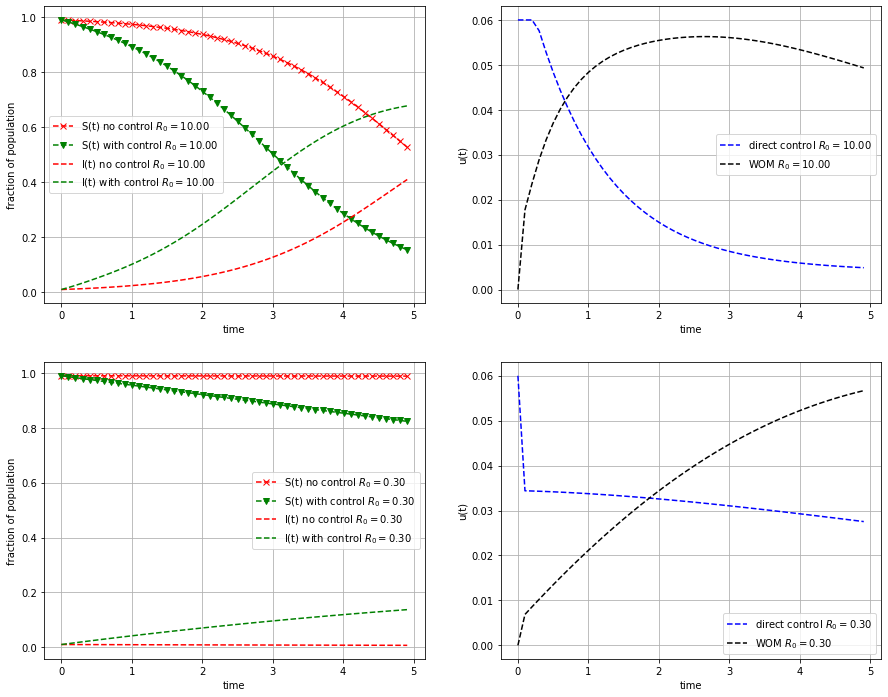

In [6]:
ns=10
fig,ax=plt.subplots(2,2,figsize=(15,12))
ax[0,0].plot(time[::ns],sol1.y[0][::ns],'--x',color='r',label='S(t) no control $R_0 = %.2f$'%(beta[0]/gamma))
ax[0,0].plot(time[::ns],s1[::ns],'--v',color='g',label='S(t) with control $R_0 = %.2f$'%(beta[0]/gamma))

ax[0,0].plot(time[::ns],sol1.y[1][::ns],'--',color='r',label='I(t) no control $R_0 = %.2f$'%(beta[0]/gamma))
ax[0,0].plot(time[::ns],i1[::ns],'--',color='g',label='I(t) with control $R_0 = %.2f$'%(beta[0]/gamma))


ax[0,1].plot(time[::ns],u1_1[::ns],'--',color='blue',label='direct control $R_0 = %.2f$'%(beta[0]/gamma))
ax[0,1].plot(time[::ns],u2_1[::ns],'--',color='black',label='WOM $R_0 = %.2f$'%(beta[0]/gamma))


ax[0,0].grid()
ax[0,1].grid()
ax[0,0].legend()
ax[0,1].legend()
ax[0,0].set_ylabel('fraction of population')
ax[0,0].set_xlabel('time')
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('u(t)')


ax[1,0].plot(time[::ns],sol2.y[0][::ns],'--x',color='r',label='S(t) no control $R_0 = %.2f$'%(beta[1]/gamma))
ax[1,0].plot(time[::ns],s2[::ns],'--v',color='g',label='S(t) with control $R_0 = %.2f$'%(beta[1]/gamma))

ax[1,0].plot(time[::ns],sol2.y[1][::ns],'--',color='r',label='I(t) no control $R_0 = %.2f$'%(beta[1]/gamma))
ax[1,0].plot(time[::ns],i2[::ns],'--',color='g',label='I(t) with control $R_0 = %.2f$'%(beta[1]/gamma))


ax[1,1].plot(time[::ns],u1_2[::ns],'--',color='blue',label='direct control $R_0 = %.2f$'%(beta[1]/gamma))
ax[1,1].plot(time[::ns],u2_2[::ns],'--',color='black',label='WOM $R_0 = %.2f$'%(beta[1]/gamma))


ax[1,0].grid()
ax[1,1].grid()
ax[1,0].legend()
ax[1,1].legend()
ax[1,0].set_ylabel('fraction of population')
ax[1,0].set_xlabel('time')
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('u(t)')
plt.savefig('SIR-1.pdf',bbox_inches='tight')

plt.show()

# SIR with time dependant beta

In [7]:
def sir_time_dependant(t, z, beta_func, gamma):
    s, i = z
    return [-beta_func(t)*s*i, beta_func(t)*s*i -gamma*i]

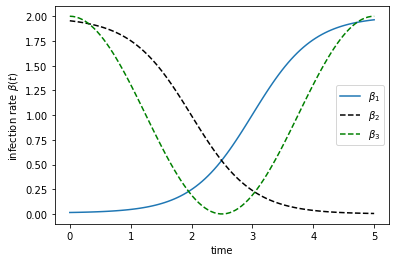

In [9]:
def beta1(t):
    return beta_m + (beta_M-beta_m)/(1+np.exp(-a1*(t-c1)))
def beta2(t):
    return (beta_M-beta_m)*(1-1/(1+np.exp(-a2*(t-c2))))
def beta3(t):
    return cm+ca*np.cos(2*np.pi*t/T)
beta_m = 0.01
beta_M = 2
a1 = 2
a2 = 2
c1 = 3
c2=2
cm=1
ca=1
T=5
t=np.linspace(0,5,100)
plt.plot(t,beta1(t), label = '$\\beta_1$')
plt.plot(t,beta2(t),'--',color='black',label = '$\\beta_2$')
plt.plot(t,beta3(t),'--',color='g',label = '$\\beta_3$')
plt.xlabel('time')
plt.ylabel('infection rate $\\beta (t)$')
plt.legend()
plt.savefig('beta.pdf',bbox_inches='tight')

In [10]:
def camp(nf,nt,beta_func,gamma,u1max,u2max):
    m = GEKKO()  # create GEKKO model
    n_f=nf
    n_t=nt  
    time = np.linspace(0,nf,nt) # time points
    m.time =time 

    b=15
    c=1

    i0=0.01
    s0=1-i0

    beta=m.Param(value=beta_func(time))
    s = m.Var(s0,lb=0,ub=1) 
    i = m.Var(i0,lb=0,ub=1) # create GEKKO variables
    j = m.Var(s0)
    u1= m.Var(u1max, lb=0 , ub=u1max)
    u2 = m.Var(0 , lb=0 , ub=u2max)
 
    p=np.zeros(nt)
    p[-1]=1
    final = m.Param(value=p)

    # create GEKKO equations
    m.Equation(s.dt() == -(beta+u2)*s*i - u1*s)
    m.Equation(i.dt() == (beta+u2)*s*i+u1*s-gamma*i)
    m.Equation(j.dt() == b*u1**2 + c*u2**2)

    m.Obj(s*final+j*final)



    m.options.IMODE = 6
    #m.options.NODES = 4
    m.solve(disp=False)
    return s.value,i.value,u1.value,u2.value

In [11]:
%%time
tf=5
n=500
time=np.linspace(0,tf,n)
gamma=0.1
u1_max=0.06
u2_max=0.3
s1,i1,u1_1,u2_1=camp(tf,n,beta1,gamma,u1_max,u2_max)
s2,i2,u1_2,u2_2=camp(tf,n,beta2,gamma,u1_max,u2_max)
s3,i3,u1_3,u2_3=camp(tf,n,beta3,gamma,u1_max,u2_max)

Wall time: 44.3 s


In [12]:
sol1 = solve_ivp(sir_time_dependant, [0, tf],[0.99, 0.01],t_eval=time,args=(beta1,gamma),
                dense_output=True)
sol2 = solve_ivp(sir_time_dependant, [0, tf],[0.99, 0.01],t_eval=time,args=(beta2,gamma),
                dense_output=True)
sol3 = solve_ivp(sir_time_dependant, [0, tf],[0.99, 0.01],t_eval=time,args=(beta3,gamma),
                dense_output=True)

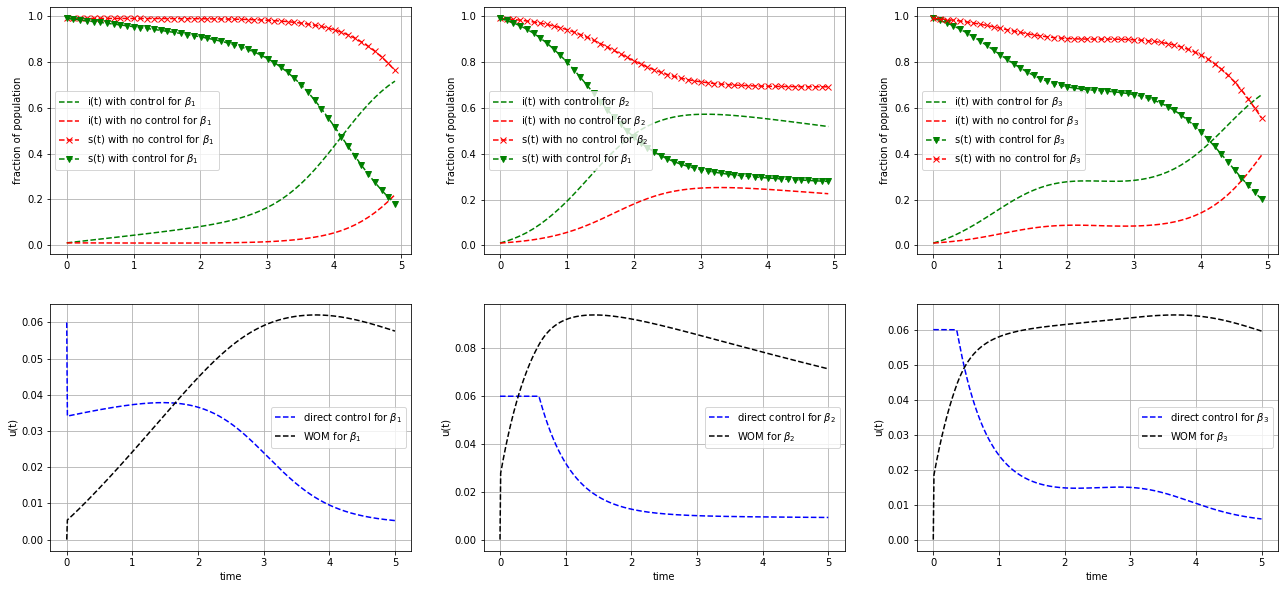

In [13]:
ns=10
fig,ax=plt.subplots(2,3,figsize=(22,10))

ax[0,0].plot(time[::ns],i1[::ns],'--',color='g',label='i(t) with control for $\\beta_1$')
ax[0,0].plot(time[::ns],sol1.y[1][::ns],'--',color='r', label='i(t) with no control for $\\beta_1$')

ax[0,0].plot(time[::ns],sol1.y[0][::ns],'--x',color='r', label='s(t) with no control for $\\beta_1$')
ax[0,0].plot(time[::ns],s1[::ns],'--v',color='g',label='s(t) with control for $\\beta_1$')

ax[1,0].plot(time,u1_1,'--',color='blue',label='direct control for $\\beta_1$')
ax[1,0].plot(time,u2_1,'--',color='black',label='WOM for $\\beta_1$')

ax[0,0].legend()
ax[1,0].legend()
ax[0,0].grid()
ax[1,0].grid()
ax[0,0].set_ylabel('fraction of population')
ax[1,0].set_ylabel('u(t)')
ax[1,0].set_xlabel('time')

ax[0,1].plot(time[::ns],i2[::ns],'--',color='g',label='i(t) with control for $\\beta_2$')
ax[0,1].plot(time[::ns],sol2.y[1][::ns],'--',color='r', label='i(t) with no control for $\\beta_2$')

ax[0,1].plot(time[::ns],sol2.y[0][::ns],'--x',color='r', label='s(t) with no control for $\\beta_2$')
ax[0,1].plot(time[::ns],s2[::ns],'--v',color='g',label='s(t) with control for $\\beta_1$')

ax[1,1].plot(time,u1_2,'--',color='blue',label='direct control for $\\beta_2$')
ax[1,1].plot(time,u2_2,'--',color='black',label='WOM for $\\beta_2$')

ax[0,1].legend()
ax[1,1].legend()
ax[0,1].grid()
ax[1,1].grid()
ax[0,1].set_ylabel('fraction of population')
ax[1,1].set_ylabel('u(t)')
ax[1,1].set_xlabel('time')

ax[0,2].plot(time[::ns],i3[::ns],'--',color='g',label='i(t) with control for $\\beta_3$')
ax[0,2].plot(time[::ns],sol3.y[1][::ns],'--',color='r', label='i(t) with no control for $\\beta_3$')

ax[0,2].plot(time[::ns],s3[::ns],'--v',color='g',label='s(t) with control for $\\beta_3$')
ax[0,2].plot(time[::ns],sol3.y[0][::ns],'--x',color='r', label='s(t) with no control for $\\beta_3$')



ax[1,2].plot(time,u1_3,'--',color='blue',label='direct control for $\\beta_3$')
ax[1,2].plot(time,u2_3,'--',color='black',label='WOM for $\\beta_3$')

ax[0,2].legend()
ax[1,2].legend()
ax[0,2].grid()
ax[1,2].grid()
ax[0,2].set_ylabel('fraction of population')
ax[1,2].set_ylabel('u(t)')
ax[1,2].set_xlabel('time')
plt.savefig('sIR-time-dep.pdf',bbox_inches='tight')
plt.show()